## Load DataFrames

In [10]:
import os
import pandas as pd

BASE_PATH = "data"

### Method Data

In [11]:
METHOD_PATH = os.path.join(BASE_PATH, "checkpoint.pkl")

df = pd.read_pickle(METHOD_PATH)
df.head(10)

,lang,repo,filename,name,has_comment,has_non_docstring_comment,len,mccabe,fanout,chars,identifiers,halstead,entropy
0,ts,nest,nest/integration/discovery/src/webhooks.explor...,constructor,False,False,3,1,0,110,4,0.000000,1.000000
1,ts,nest,nest/integration/discovery/src/webhooks.explor...,getWebhooks,False,False,26,1,6,635,28,224.008189,4.566150
2,ts,nest,nest/integration/graphql-code-first/src/common...,canActivate,False,False,6,2,1,132,6,31.699250,4.004344
3,ts,nest,nest/integration/graphql-code-first/src/common...,parseLiteral,True,True,4,2,1,84,7,43.185065,4.137538
4,ts,nest,nest/integration/graphql-code-first/src/main.ts,bootstrap,False,False,4,1,3,119,9,62.269769,3.913401
5,ts,nest,nest/integration/graphql-code-first/src/recipe...,recipe,False,False,6,2,1,131,8,51.891474,4.155639
6,ts,nest,nest/integration/graphql-code-first/src/recipe...,addRecipe,False,False,6,1,2,219,14,55.350906,4.314973
7,ts,nest,nest/integration/graphql-code-first/src/recipe...,create,True,False,4,1,0,33,1,2.000000,3.251629
8,ts,nest,nest/integration/graphql-schema-first/src/asyn...,createGqlOptions,False,False,4,1,1,67,3,8.000000,3.795089
9,ts,nest,nest/integration/graphql-schema-first/src/cats...,create,False,False,3,1,1,36,4,16.253497,3.378783


#### Base stats on comment usage

In [12]:
percent_with_comment_per_lang = (
    df.groupby('lang')['has_comment'].mean().mul(100).sort_values(
        ascending=False))
percent_with_comment_per_repo = (
    df.groupby('repo')['has_comment'].mean().mul(100).sort_values(
        ascending=False))

print(percent_with_comment_per_lang)
percent_with_comment_per_repo

lang
py      53.484113
cpp     40.059301
java    38.128473
rs      37.792761
ts      35.301421
Name: has_comment, dtype: float64


repo
tesseract          84.168704
ignite             82.799573
scikit-learn       66.731581
uv                 66.708582
ansible            65.171849
core               63.982888
imgui              60.058480
TypeScript         59.618794
terminal           57.142857
alacritty          55.771725
django             53.480832
angular            53.360560
transformers       52.485128
stablediffusion    48.905109
sway               46.982759
vite               46.643110
rust               46.077901
tensorflow         45.454717
bitcoin            41.780448
spark              41.766784
tauri              40.184332
beam               39.609664
hadoop             38.699959
grpc               38.269057
puppeteer          36.846543
kafka              36.750258
n8n                36.338619
hoppscotch         34.818942
opencv             34.166394
electron           34.025904
keras              33.139253
godot              32.651281
elasticsearch      30.890854
x64dbg             29.540301
vscode   

### Full Metrics Per Project and Language

In [13]:
FULL_PATH = os.path.join(BASE_PATH, "all_stats.pkl")

all_metrics_df = pd.read_pickle(FULL_PATH)
all_metrics_df.head(10)

,repo,lang,metric,overall_mean,overall_median,comment_mean,comment_median,non_comment_mean,non_comment_median,cliffs_delta,mannwhitneyu_p,n_comment,n_non_comment,n_total
0,ComfyUI,py,mccabe,2.954363,2.000000,4.412292,3.000000,2.372829,2.000000,0.347403,4.554705e-50,781,1958,2739
1,ComfyUI,py,fanout,6.916393,4.000000,11.595391,9.000000,5.050051,3.000000,0.509979,2.402678e-97,781,1958,2739
2,ComfyUI,py,chars,720.532311,437.000000,1142.859155,762.000000,552.076098,367.000000,0.409899,3.887883e-63,781,1958,2739
3,ComfyUI,py,identifiers,43.179628,27.000000,73.693982,56.000000,31.008172,21.000000,0.515216,1.045586e-98,781,1958,2739
4,ComfyUI,py,halstead,219.831209,106.274034,414.106910,271.028588,142.339216,76.078200,0.537301,3.510219e-107,781,1958,2739
5,ComfyUI,py,entropy,4.316557,4.341131,4.747827,4.794516,4.144534,4.187516,0.559313,6.393005e-116,781,1958,2739
6,TypeScript,ts,mccabe,3.055408,2.000000,3.717100,2.000000,2.078485,2.000000,0.295526,4.810270e-68,2690,1822,4512
7,TypeScript,ts,fanout,6.733156,4.000000,8.523792,5.000000,4.089462,3.000000,0.255287,1.620212e-48,2690,1822,4512
8,TypeScript,ts,chars,741.332890,385.000000,964.378439,504.000000,412.028540,288.500000,0.339549,1.111410e-83,2690,1822,4512
9,TypeScript,ts,identifiers,39.041002,22.000000,49.681413,28.000000,23.331504,17.000000,0.322548,9.981629e-76,2690,1822,4512


#### Example Query

In [14]:
all_metrics_df[all_metrics_df["lang"] == "cpp"]

,repo,lang,metric,overall_mean,overall_median,comment_mean,comment_median,non_comment_mean,non_comment_median,cliffs_delta,mannwhitneyu_p,n_comment,n_non_comment,n_total
36,bitcoin,cpp,mccabe,3.207355,2.000000,4.936383,3.000000,1.966542,1.000000,0.534346,3.035521e-271,2295,3198,5493
37,bitcoin,cpp,fanout,7.770435,4.000000,13.118954,8.000000,3.932145,2.000000,0.538801,3.248274e-257,2295,3198,5493
38,bitcoin,cpp,chars,560.063353,249.000000,981.024401,561.000000,257.966542,143.000000,0.623889,0.000000e+00,2295,3198,5493
39,bitcoin,cpp,identifiers,36.507919,18.000000,63.052723,39.000000,17.458412,11.000000,0.607175,0.000000e+00,2295,3198,5493
40,bitcoin,cpp,halstead,299.430775,110.361497,554.771930,292.297582,116.188764,58.084869,0.610190,0.000000e+00,2295,3198,5493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,overall,cpp,fanout,9.808354,5.000000,15.899828,9.000000,5.737327,3.000000,0.457606,0.000000e+00,63770,95419,159189
302,overall,cpp,chars,699.558921,333.000000,1160.789980,703.000000,391.311039,216.000000,0.530205,0.000000e+00,63770,95419,159189
303,overall,cpp,identifiers,46.592824,23.000000,76.025812,47.000000,26.922301,15.000000,0.510698,0.000000e+00,63770,95419,159189
304,overall,cpp,halstead,382.137134,133.215830,672.800549,338.532679,187.882259,76.147098,0.514381,0.000000e+00,63770,95419,159189


### Cliff's Deltas Per LOC

In [15]:
CLIFFS_BY_LOC_PATH = os.path.join(BASE_PATH, "cliffs_by_loc.pkl")

cliffs_df = pd.read_pickle(CLIFFS_BY_LOC_PATH)
cliffs_df.head(10)

,len,metric,overall,overall_p,ts,cpp,java,py,rs,ts_p,cpp_p,java_p,py_p,rs_p
0,3,mccabe,0.103763,2.509308e-116,0.072516,0.086405,0.027446,0.156767,0.098447,7.308738e-29,9.610319e-50,2.915897e-04,3.657417e-18,3.530231e-33
1,3,fanout,0.200547,3.776807e-108,0.150576,0.115808,0.205015,0.222038,0.218692,5.544334e-10,4.384952e-13,1.703596e-30,4.531436e-26,3.260049e-12
2,3,chars,0.349226,1.584110e-300,0.308939,0.264537,0.281536,0.258270,0.416337,6.245039e-34,7.525044e-56,1.056142e-51,4.418028e-33,4.513377e-38
3,3,identifiers,0.317987,5.568227e-252,0.294806,0.162731,0.271839,0.240090,0.320595,2.168926e-31,2.307569e-22,2.915262e-49,5.824139e-29,1.897775e-23
4,3,halstead,0.331185,3.486550e-271,0.275531,0.092413,0.311851,0.261188,0.315653,2.366377e-27,3.659836e-08,1.355638e-63,7.890650e-34,1.355310e-22
5,3,entropy,0.412228,0.000000e+00,0.348689,0.248366,0.431590,0.394958,0.535161,9.013566e-43,1.839525e-49,4.880883e-119,5.384797e-75,9.471731e-62
6,4,mccabe,0.156682,1.232838e-124,0.108306,0.233968,0.099435,0.157181,0.055413,2.783141e-10,4.417568e-126,5.461769e-12,6.149687e-20,4.403775e-03
7,4,fanout,0.175983,1.614524e-85,0.103015,0.157949,0.227035,0.279699,0.153367,3.024567e-05,1.394262e-25,2.406951e-31,1.249748e-45,4.532357e-07
8,4,chars,0.191786,5.829219e-97,0.238034,0.128231,0.191055,0.179914,0.272625,4.860306e-21,1.370217e-16,8.366471e-22,3.906782e-19,1.249288e-18
9,4,identifiers,0.175632,5.229164e-82,0.217606,0.058955,0.167208,0.240487,0.211639,6.029257e-18,1.379383e-04,3.698655e-17,5.095902e-33,6.842803e-12


### Generate NonCommentMethod Percentage Graph and Decision Points

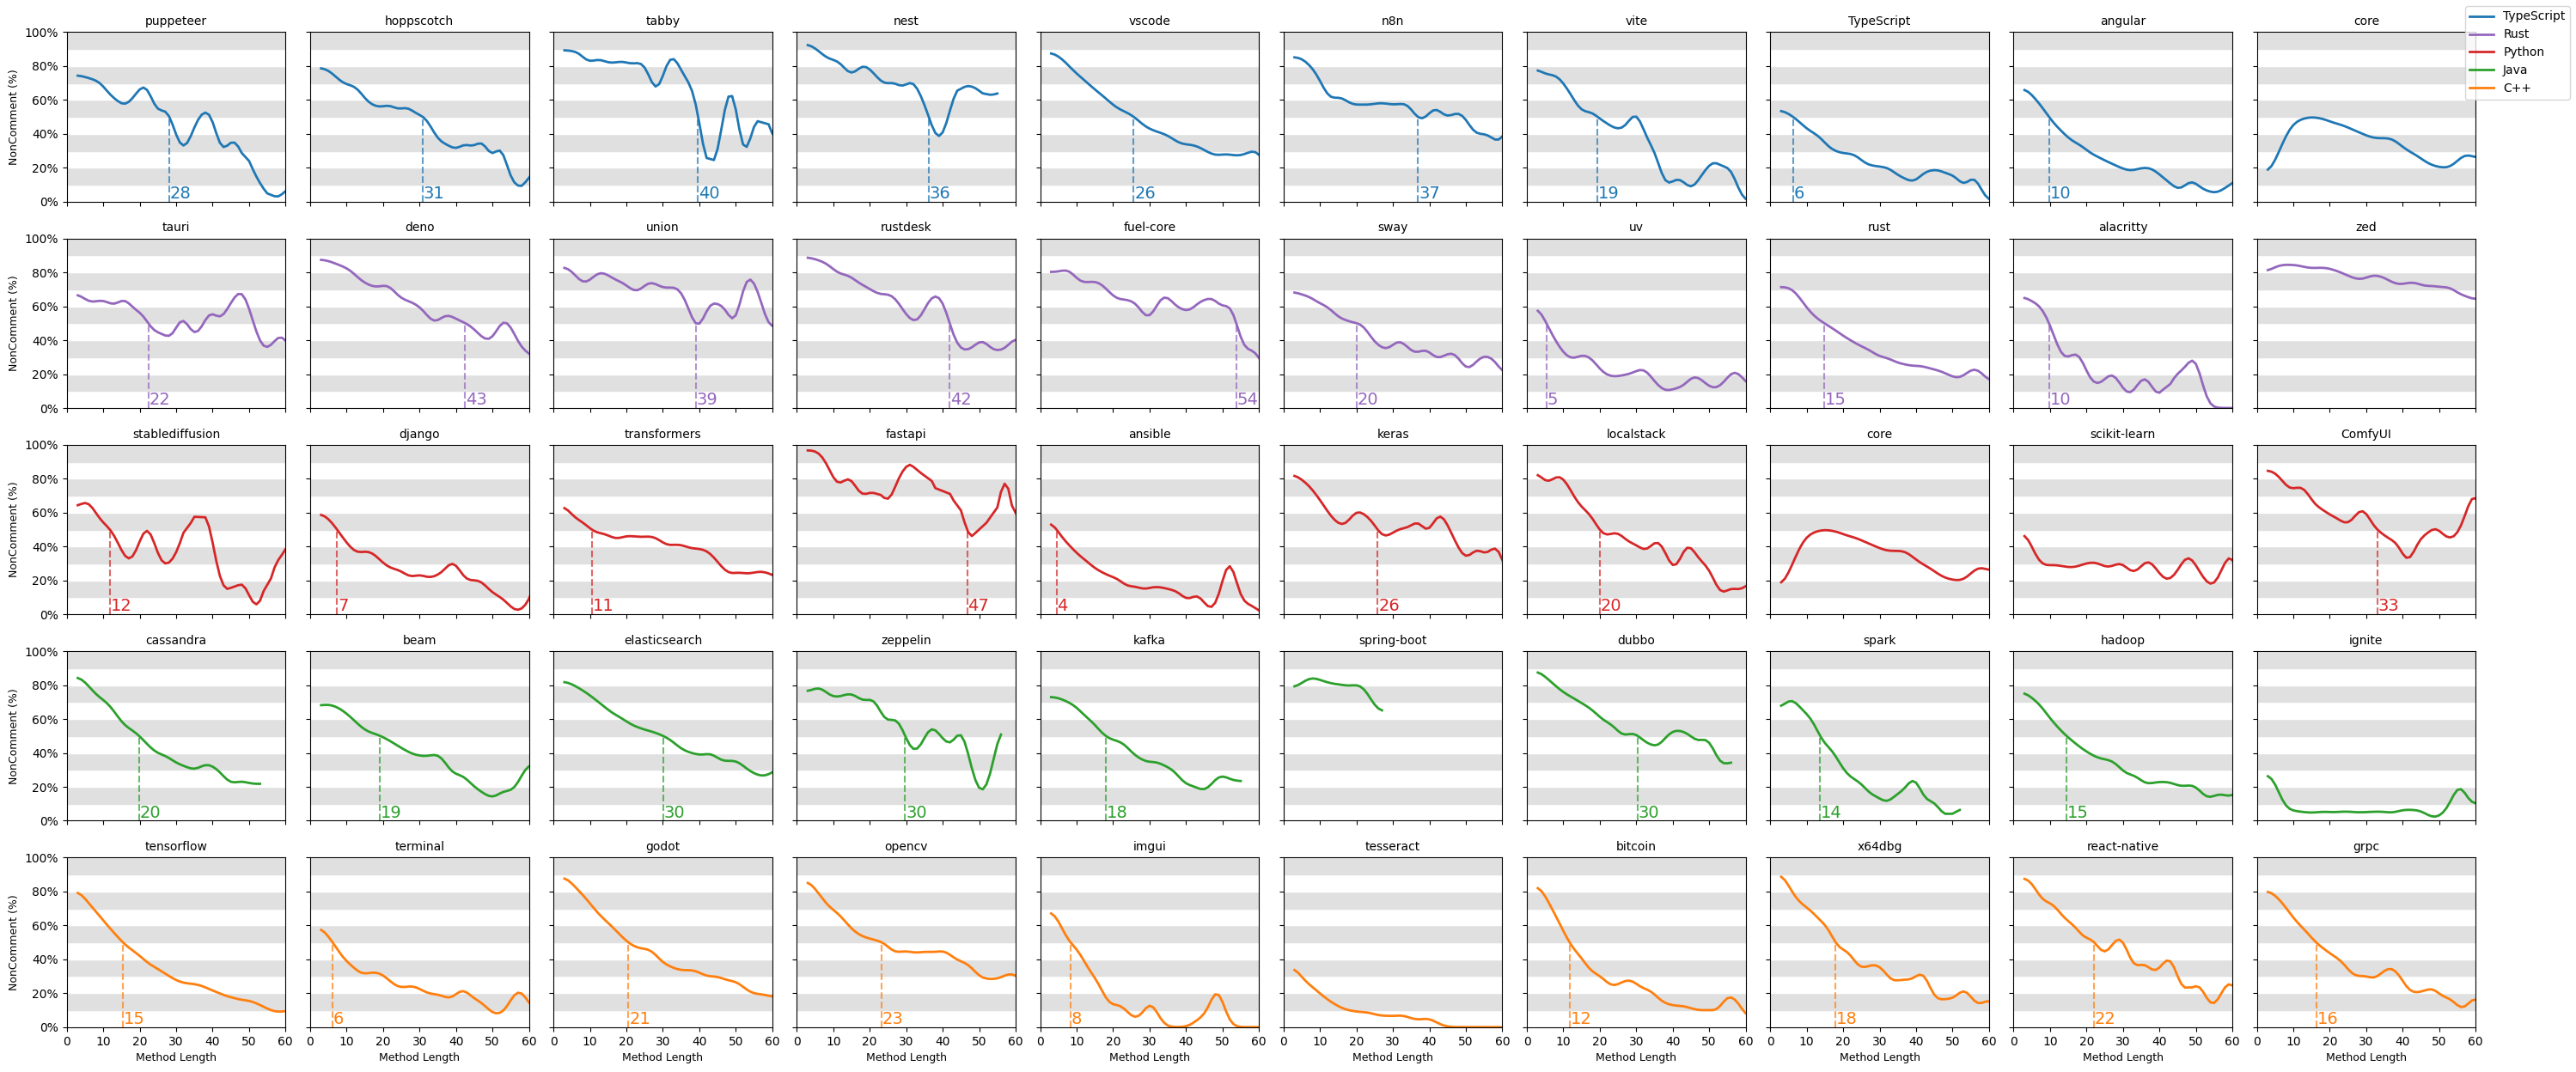

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from scipy.ndimage import gaussian_filter1d


def find_decision_point(repo_df, lim=50, xlim=60) -> int | None:
    total_per_len = repo_df.groupby('len').size()
    non_comment_per_len = repo_df[~repo_df['has_comment']].groupby(
        'len').size()
    percent_non_comment = (non_comment_per_len / total_per_len * 100).fillna(0)
    smoothed = gaussian_filter1d(percent_non_comment.values, sigma=2)

    indices = np.where(np.diff(np.sign(smoothed - lim)))[0]
    for idx in indices:
        x0, x1 = percent_non_comment.index[idx], percent_non_comment.index[idx
                                                                           + 1]
        y0, y1 = smoothed[idx], smoothed[idx + 1]
        if y1 != y0:
            x_cross = x0 + (lim - y0) * (x1 - x0) / (y1 - y0)
        else:
            x_cross = x0
        if x_cross < xlim:
            return x_cross


X_LIM = 60
# Disambiguate repos with duplicate names by including language as a prefix (two repos are named "core")
repo_lang_pairs = sorted(set(
    (row['lang'], row['repo'])
    for _, row in df[['lang', 'repo']].drop_duplicates().iterrows()),
                         key=lambda pair: pair[0],
                         reverse=True)
repos = [f"{lang}::{repo}" for lang, repo in repo_lang_pairs]
n_cols = 10
n_rows = 5
fig, axes = plt.subplots(n_rows,
                         n_cols,
                         figsize=(n_cols * 3, n_rows * 2.5),
                         sharex=True,
                         sharey=True)
axes = axes.flatten()
langs = ['ts', 'cpp', 'java', 'py', 'rs']
LANG_TO_LABEL = {
    "py": "Python",
    "rs": "Rust",
    "ts": "TypeScript",
    "java": "Java",
    "cpp": "C++"
}

decision_points = dict()
NCM_PERCENT_THRESHOLDS = range(30, 71, 5)

seen_langs = set()
for i, repo_lang in enumerate(repos):
    # off by 1 lol so ignore the last cpp repo
    if i == len(repos) - 1:
        break
    ax = axes[i]
    lang, repo = repo_lang.split("::")
    repo_df = df[df['repo'] == repo]
    palette = dict(zip(langs, sns.color_palette("tab10", n_colors=len(langs))))

    total_per_len = repo_df.groupby('len').size()
    non_comment_per_len = repo_df[~repo_df['has_comment']].groupby(
        'len').size()
    percent_non_comment = (non_comment_per_len / total_per_len * 100).fillna(0)
    smoothed = gaussian_filter1d(percent_non_comment.values, sigma=2)
    ax.plot(percent_non_comment.index,
            smoothed,
            label=LANG_TO_LABEL.get(lang, lang)
            if lang not in seen_langs else None,
            color=palette[lang],
            linewidth=2)
    # Find where the smoothed curve crosses 50% and add a vertical line
    # only plot the first crossing
    lim = 50
    x_cross = find_decision_point(repo_df, lim=lim, xlim=X_LIM)
    if x_cross:
        ax.axvline(x_cross,
                   ymax=lim / 100,
                   color=palette[lang],
                   linestyle='--',
                   alpha=0.7)
        ax.text(x_cross + .2,
                0,
                f"{x_cross:0.0f}",
                color=palette[lang],
                va='bottom',
                ha='left',
                fontsize=14)

    # also find the LOC threshold for different % NCM
    loc_limits_for_repo = dict()
    for ncm_perc in NCM_PERCENT_THRESHOLDS:
        loc_limit = find_decision_point(repo_df, ncm_perc, xlim=200)
        if loc_limit is not None:
            loc_limit = f"{loc_limit:0.0f}"
        loc_limits_for_repo[ncm_perc] = loc_limit
    decision_points[repo_lang] = loc_limits_for_repo

    seen_langs.add(lang)

    ax.set_title(repo, fontsize=10)
    ax.set_xlim(0, X_LIM)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ax.set_yticks(range(0, 101, 20))
    if i % n_cols == 0:
        ax.set_ylabel("NonComment (%)", fontsize=9)
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Method Length", fontsize=9)
    # alternating background rows
    for y in range(0, 101, 10):
        color = "#ffffff" if (y // 10) % 2 == 0 else "#e0e0e0"
        ax.axhspan(y, y + 10, color=color, zorder=0)

# Remove unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])
fig.legend()
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.savefig(os.path.join(BASE_PATH, "repo_comment_proportions.pdf"))

# save everything
dp_rows = []
for repo_lang, loc_limits in decision_points.items():
    row = {'repo_lang': repo_lang}
    row.update(loc_limits)
    dp_rows.append(row)
dp_df = pd.DataFrame(dp_rows)
dp_df.to_csv(os.path.join(BASE_PATH, "repo_decision_points.csv"), index=False)
plt.show()
